##**3DOF Robot Arm Forward Kinematics Simulation: Overview and Equation**

##**Overview**
This simulation models the forward kinematics of a 3-degree-of-freedom (3DOF) robotic arm with three revolute joints, implemented in Python using NumPy for calculations and Matplotlib for visualization.
The arm's configuration is defined using Denavit-Hartenberg (DH) parameters, a standard method for describing the geometry of robotic manipulators.
The simulation computes the position of the arm's joints and end-effector based on given joint angles and visualizes the arm in two ways:
**Static 3D Plot**: Displays the arm in its initial configuration (all joint angles at 0°), showing the positions of the base, joints, and end-effector in a 3D Cartesian space.
**Animated 3D Plot**: Animates the arm's motion through a predefined joint angle trajectory, with a trace of the end-effector’s path to illustrate its workspace. The animation updates the arm's configuration over time, showing how joint angles affect the end-effector position.

##**Key Features**
Forward Kinematics: Computes the end-effector position using DH transformation matrices for a 3DOF arm with equal link lengths (0.1 m).

**Visualization**: Includes a static plot for the initial position and an animated plot showing dynamic motion with an end-effector trace.

**Trajectory**: The animation uses sinusoidal trajectories for joints 1 and 3 (oscillating between -45° and 45°) and a linear sweep for joint 2 (0° to 180°), creating a smooth and dynamic motion.

**Purpose**: Suitable for educational purposes, robotic arm design analysis, or understanding manipulator kinematics.

##**Implementation Details**
**DH Parameters**: Define the arm’s geometry with joint angles ((\theta)), link offsets ((d)), link lengths ((a)), and link twists ((\alpha)).
**Dependencies**: Requires NumPy for matrix operations and Matplotlib for 3D plotting and animation.
##**Output**: Two plots are generated:
**A static 3D plot of the arm’s initial configuration.**
An animated 3D plot showing the arm’s motion with a green dashed line tracing the end-effector’s path.
**Customization**: Users can modify link lengths, joint trajectories, or animation parameters to explore different configurations or motions.

##**Equations for 3DOF Robotic Arm Forward Kinematics Simulation**
Below are the mathematical equations used in the forward kinematics simulation of a 3-degree-of-freedom (3DOF) robotic arm with three revolute joints. These equations describe the kinematic chain using the Denavit-Hartenberg (DH) convention and define the animation trajectory.

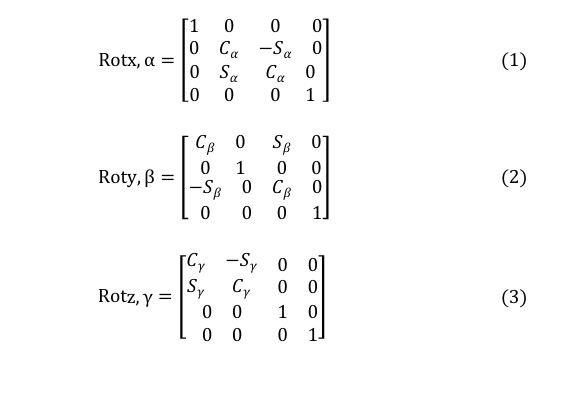

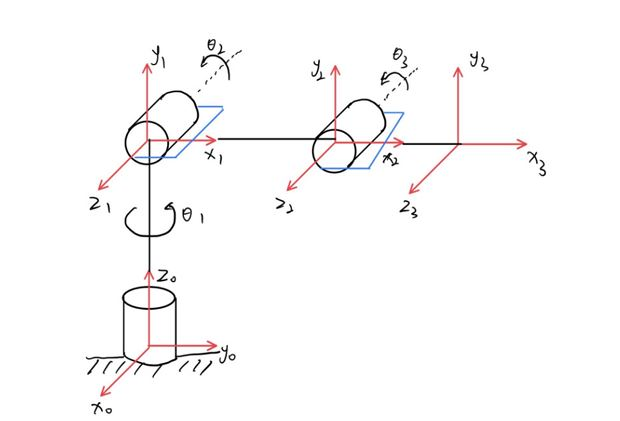

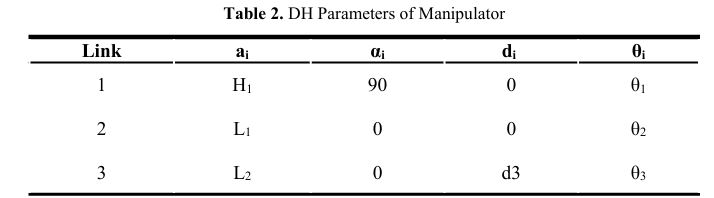

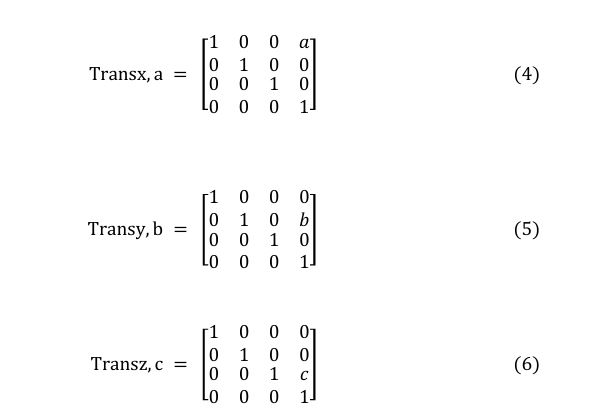

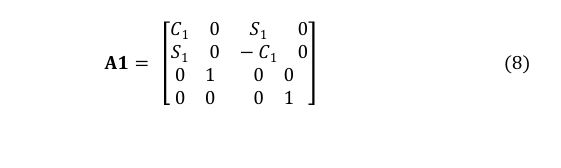

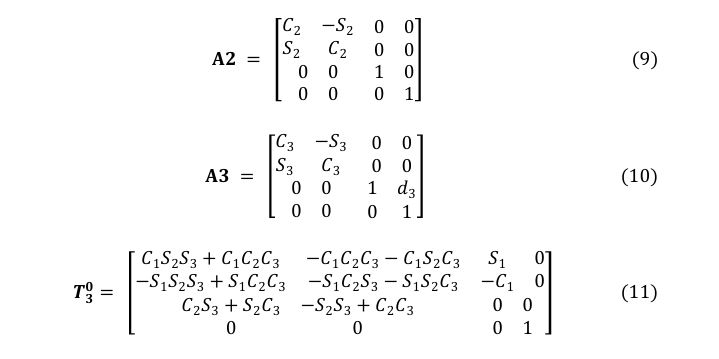

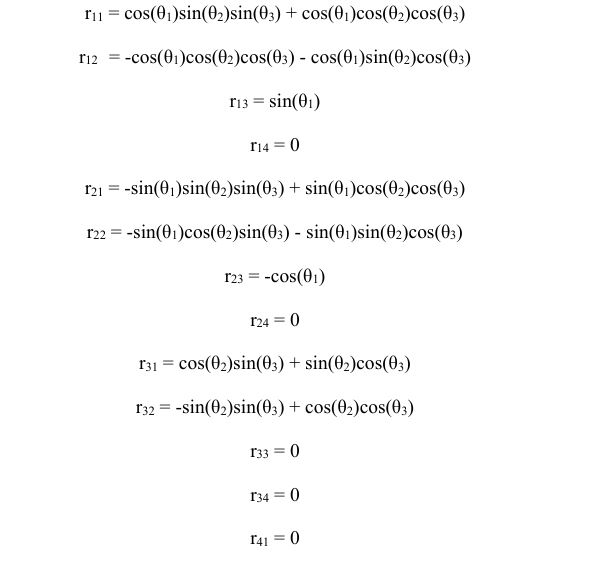

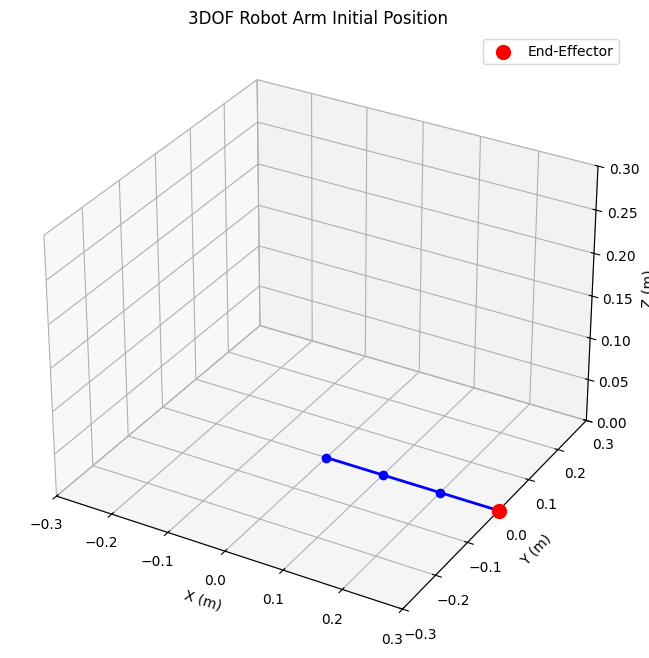

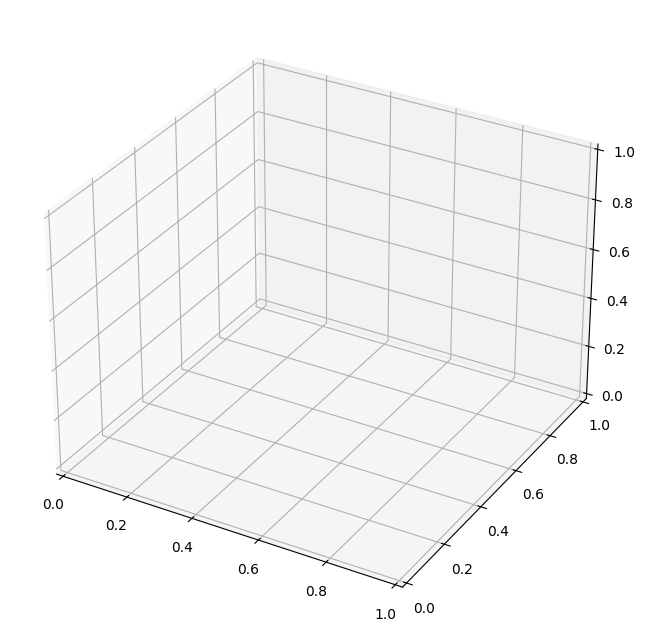

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Define DH parameters for a 3DOF robotic arm
# [theta, d, a, alpha] for each joint
# theta: joint angle, d: link offset, a: link length, alpha: link twist
dh_params = [
    [0, 0, 0.1, np.pi/2],  # Joint 1: base to link 1
    [0, 0, 0.1, 0],        # Joint 2: link 1 to link 2
    [0, 0, 0.1, 0]         # Joint 3: link 2 to end-effector
]

# Link lengths (m)
L1, L2, L3 = 0.1, 0.1, 0.1

# Forward kinematics function using DH parameters
def dh_transform(theta, d, a, alpha):
    """Compute transformation matrix for a DH parameter set."""
    return np.array([
        [np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],
        [np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],
        [0, np.sin(alpha), np.cos(alpha), d],
        [0, 0, 0, 1]
    ])

def forward_kinematics(joint_angles):
    """Compute end-effector position and transformation matrices for 3DOF arm."""
    T = np.eye(4)  # Initialize transformation matrix
    points = [[0, 0, 0]]  # Base point
    for i in range(3):
        T_i = dh_transform(joint_angles[i], dh_params[i][1], dh_params[i][2], dh_params[i][3])
        T = T @ T_i
        point = T[:3, 3]
        points.append(point.tolist())
    return np.array(points), T

# Animation setup with end-effector trace
def animate_arm(joint_angles_traj):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Store end-effector positions for tracing
    end_effector_trace = []

    def update(frame):
        ax.cla()  # Clear previous frame
        # Compute joint positions for current angles
        angles = joint_angles_traj[frame]
        points, T_end = forward_kinematics(angles)

        # Update end-effector trace
        end_effector_pos = points[-1]
        end_effector_trace.append(end_effector_pos)
        trace_array = np.array(end_effector_trace)

        # Plot arm
        ax.plot(points[:, 0], points[:, 1], points[:, 2], 'b-', linewidth=2, marker='o', label='Arm')
        ax.scatter(points[-1, 0], points[-1, 1], points[-1, 2], color='r', s=100, label='End-Effector')

        # Plot end-effector trace
        if len(trace_array) > 1:
            ax.plot(trace_array[:, 0], trace_array[:, 1], trace_array[:, 2], 'g--', alpha=0.5, label='End-Effector Path')

        # Set plot limits
        ax.set_xlim([-0.3, 0.3])
        ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([0, 0.3])
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_zlabel('Z (m)')
        ax.set_title(f'3DOF Robot Arm\nθ1={np.degrees(angles[0]):.2f}°, θ2={np.degrees(angles[1]):.2f}°, θ3={np.degrees(angles[2]):.2f}°')
        ax.legend()
        ax.grid(True)
        return ax

    ani = animation.FuncAnimation(fig, update, frames=len(joint_angles_traj), interval=30, blit=False)
    plt.show()

# Generate joint angle trajectory for animation
num_frames = 200
theta1_traj = np.sin(np.linspace(0, 2*np.pi, num_frames)) * np.pi/4  # Joint 1: sinusoidal -45° to 45°
theta2_traj = np.linspace(0, np.pi, num_frames)                      # Joint 2: 0° to 180°
theta3_traj = np.cos(np.linspace(0, 2*np.pi, num_frames)) * np.pi/4  # Joint 3: sinusoidal -45° to 45°
joint_angles_traj = np.vstack((theta1_traj, theta2_traj, theta3_traj)).T

# Static plot for initial position
initial_angles = [0, 0, 0]
points, T_end = forward_kinematics(initial_angles)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:, 0], points[:, 1], points[:, 2], 'b-', linewidth=2, marker='o')
ax.scatter(points[-1, 0], points[-1, 1], points[-1, 2], color='r', s=100, label='End-Effector')
ax.set_xlim([-0.3, 0.3])
ax.set_ylim([-0.3, 0.3])
ax.set_zlim([0, 0.3])
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3DOF Robot Arm Initial Position')
ax.legend()
ax.grid(True)
plt.show()

# Run animation
animate_arm(joint_angles_traj)

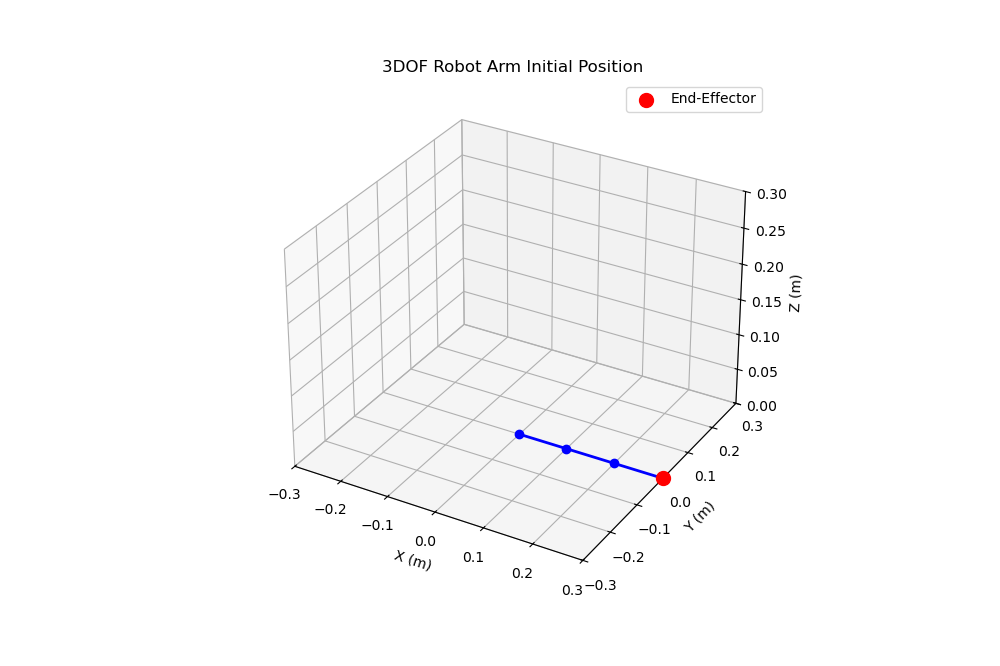

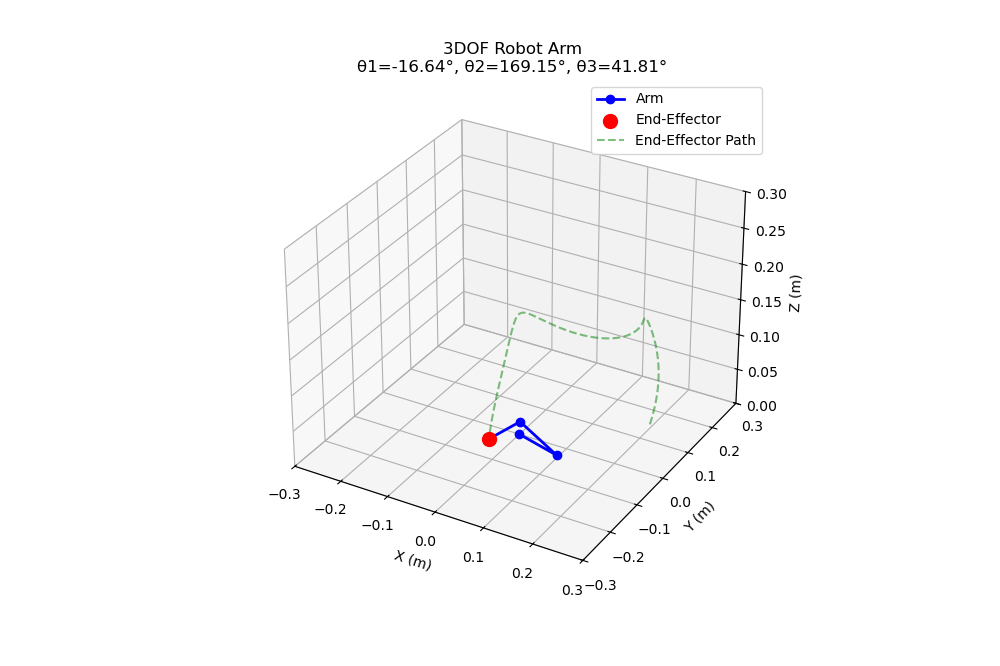